In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv("sales.csv")

In [3]:
df.head(2)

,order_id,customer_id,order_date,product_id,category,quantity,price
0,100,468,2023-03-22,87,Accessories,3,291.88
1,101,3,2023-03-19,62,Electronics,2,361.80


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     10000 non-null  int64         
 1   customer_id  10000 non-null  int64         
 2   order_date   10000 non-null  datetime64[ns]
 3   product_id   10000 non-null  int64         
 4   category     10000 non-null  object        
 5   quantity     10000 non-null  int64         
 6   price        10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 547.0+ KB


Check for missing values and handle them appropriately

In [8]:
df.isnull().sum()
df.duplicated().sum()

0

###  Data Quality Check Summary

We can clearly see that there are **no missing values** and **no duplicate values** in the dataset. The data is clean and ready for analysis.
. 

In [11]:
df['quantity'].unique()         # Should be positive integers
df['price'].describe()          # Check for outliers or 0
df['category'].value_counts()   # Check for typos or 'unknown'
df['order_date'] = pd.to_datetime(df['order_date'])  # Convert to datetime

In [13]:
df['total_price'] = df['quantity']*df['price']

df.head()

### ️ Revenue Calculation

1. **Create a New Column: `total_price`**
    - The `total_price` will be calculated by multiplying the `quantity` with `price` for each order.
    
    

2. **Find the Total Revenue Generated Per Product Category**
    - We will group the data by the `category` and sum the `total_price` for each category to get the total revenue.

 

This will show the total revenue for each product category, sorted from highest to lowest revenue.


      category  total_price
0  Accessories   1520374.00
1     Clothing   1553144.08
2  Electronics   1524097.88
3    Furniture   1496052.77
4    Groceries   1542710.05


C:\Users\vipul\AppData\Local\Temp\ipykernel_6008\1482024437.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_per_category, x='category', y='total_price', palette='viridis')


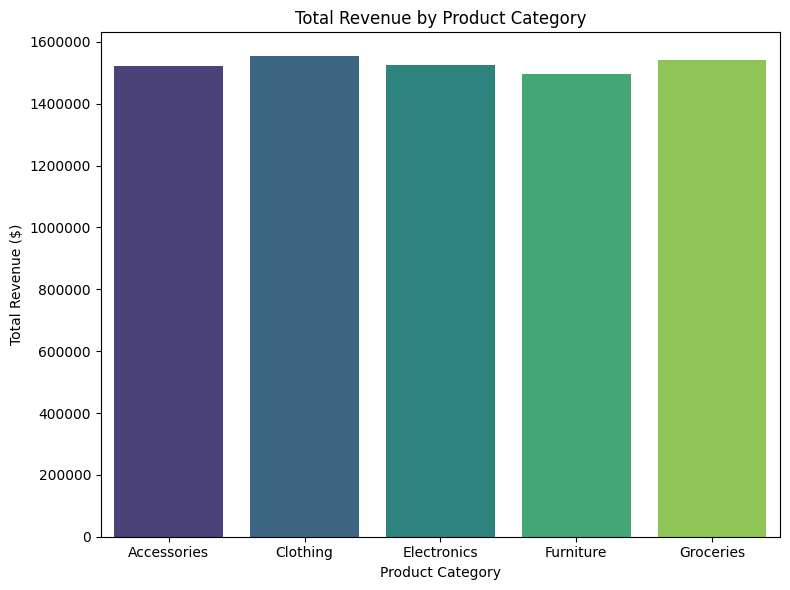

In [37]:
from matplotlib.ticker import ScalarFormatter
revenue_per_category = df.groupby('category')['total_price'].sum().reset_index()
revenue_per_category.sort_values(by = 'total_price' ,  ascending = False )
print(revenue_per_category)
# Visualize revenue by category
plt.figure(figsize=(8, 6))
sns.barplot(data=revenue_per_category, x='category', y='total_price', palette='viridis')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)

# Disable scientific notation on y-axis
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()

# Save the plot
plt.savefig('revenue_by_category.png')
plt.show()

# Revenue Calculation Explanation

## Steps

- **Loading Data**: The code loads the sales_data.csv file into a Pandas DataFrame.
- **Total Price Calculation**: A new column total_price is created by multiplying the quantity and price columns.
- **Revenue by Category**: BigBrain mode is **not** included in the free plan. It is **not** included in the SuperGrok subscription. It is **not** included in any x.com subscription plans.
- **Output**: The result shows the total revenue for each product category in a clear, tabular f clarity.

3. ### Output of Total Revenue per Category:

    

    | category    | total_price |
    |-------------|-------------|
    | Accessories    | ₹ 1520374.00     |
    | Clothing      | ₹ 1553144.08     |
    | Electronics      | ₹ 1524097.88      |
    | Furniture       | ₹ 1496052.77      |
    | Groceries    | ₹ 1542710.05      |


### ️ Customer Retention

- Identify repeat customers who placed more than 2 orders.


In [25]:
repeat_customers = df.groupby('customer_id')['order_id'].count().reset_index()
print(repeat_customers)

     customer_id  order_id
0              1        17
1              2        17
2              3        16
3              4        15
4              5        15
..           ...       ...
495          496        13
496          497        17
497          498        20
498          499        23
499          500        25

[500 rows x 2 columns]


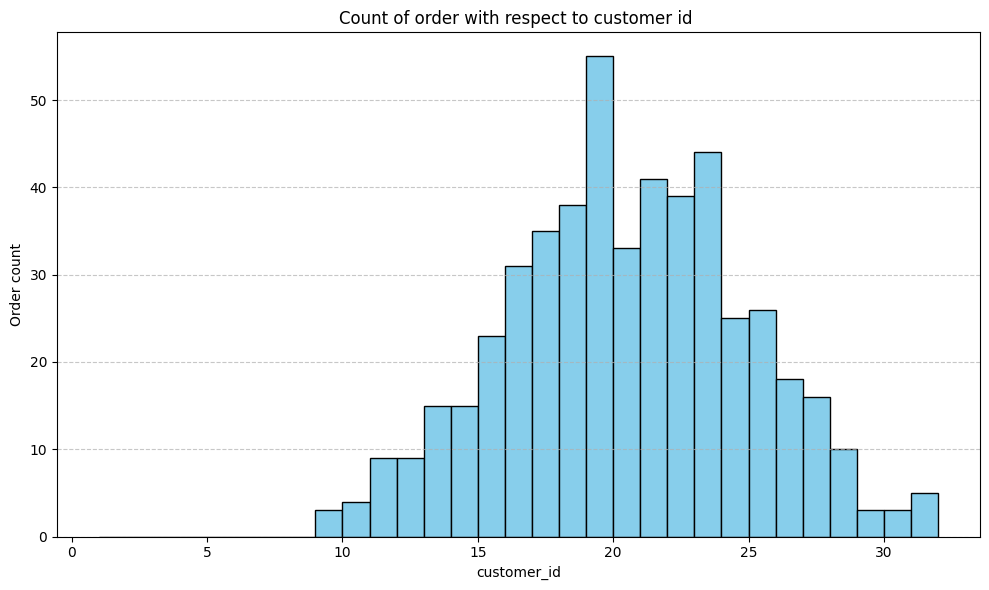

In [41]:
import matplotlib.pyplot as plt

# Rename columns for clarity
repeat_customers.columns = ['customer_id', 'order_count']

# Plotting histogram to show frequency of customers by number of orders
plt.figure(figsize=(10, 6))
plt.hist(repeat_customers['order_count'], bins=range(1, repeat_customers['order_count'].max()+1), color='skyblue', edgecolor='black')
plt.title('Count of order with respect to customer id ')
plt.xlabel('customer_id')
plt.ylabel('Order count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### ️ Sales Trend

- Create a time series plot of monthly sales revenue.


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     10000 non-null  int64         
 1   customer_id  10000 non-null  int64         
 2   order_date   10000 non-null  datetime64[ns]
 3   product_id   10000 non-null  int64         
 4   category     10000 non-null  object        
 5   quantity     10000 non-null  int64         
 6   price        10000 non-null  float64       
 7   total_price  10000 non-null  float64       
 8   month_year   10000 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(4), object(1), period[M](1)
memory usage: 703.3+ KB


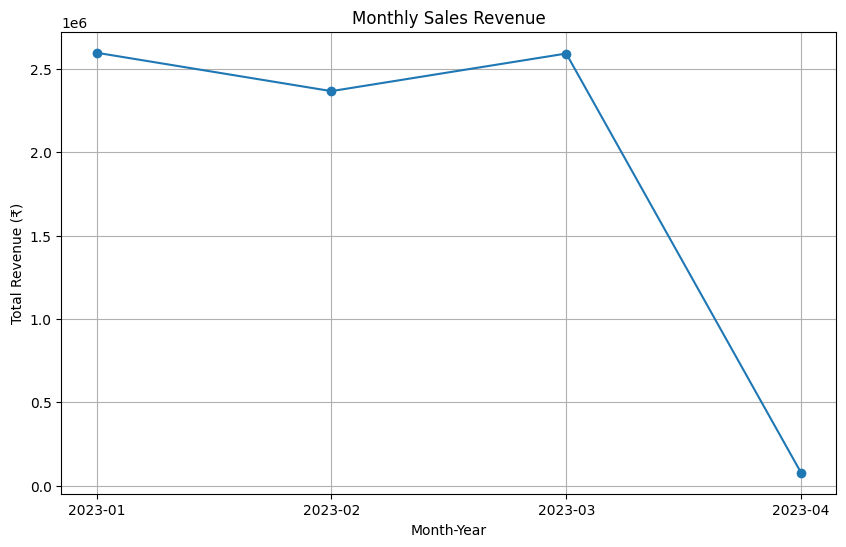

In [32]:
df['month_year'] = df['order_date'].dt.to_period('M')

# Group by month_year and calculate total revenue per month
monthly_sales = df.groupby('month_year')['total_price'].sum().reset_index()

# Plot the time series of monthly sales revenue
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['month_year'].astype(str), monthly_sales['total_price'], marker='o')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

### ️Top 5 Customers by Revenue

- Find and visualize the top 5 customers who contributed the most revenue.


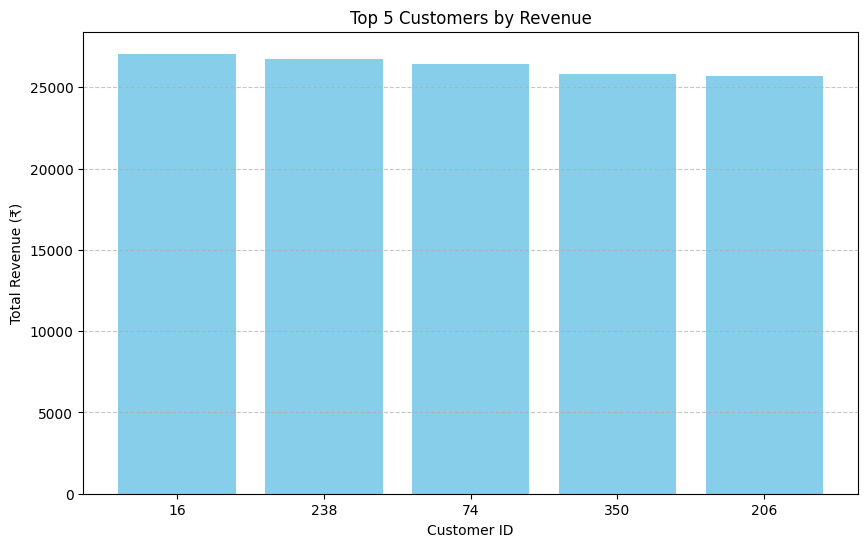

In [31]:
# Group by 'customer_id' and calculate the total revenue for each customer
top_customers = df.groupby('customer_id')['total_price'].sum().reset_index()

# Sort the customers by total revenue in descending order and select the top 5
top_5_customers = top_customers.sort_values(by='total_price', ascending=False).head(5)

# Plot the top 5 customers by revenue
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_5_customers['customer_id'].astype(str), top_5_customers['total_price'], color='skyblue')
plt.title('Top 5 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### ️ Category Performance

- Create a bar chart comparing total revenue across different product categories.


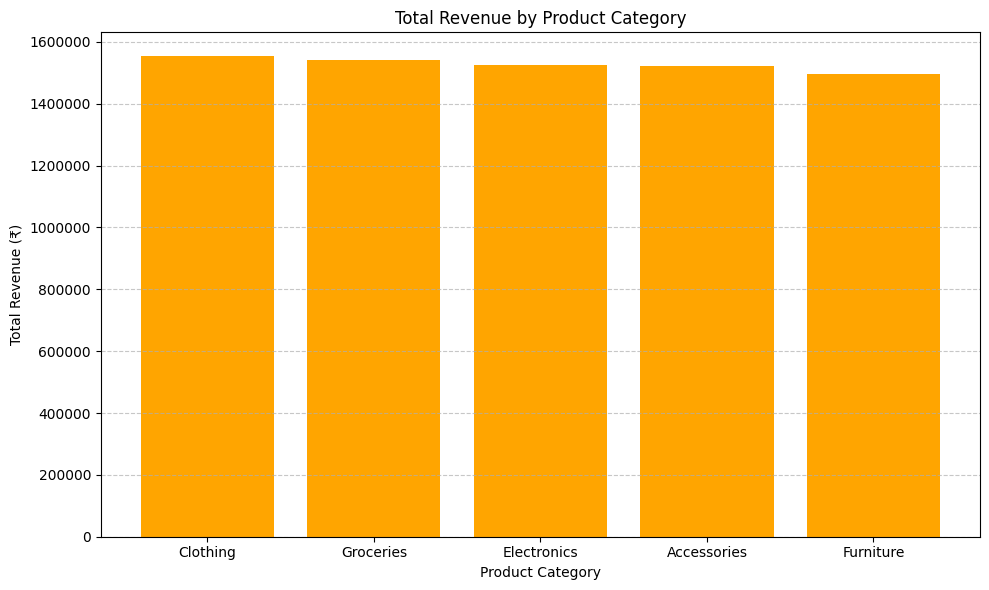

In [42]:
# Group by 'category' and calculate total revenue
category_revenue = df.groupby('category')['total_price'].sum().reset_index()

# Sort categories by revenue (optional)
category_revenue = category_revenue.sort_values(by='total_price', ascending=False)

# Plot the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(category_revenue['category'], category_revenue['total_price'], color='orange')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')  # Ensure y-axis uses plain formatting
plt.tight_layout()
plt.show()



R² Score: 37.02
RMSE: 203332.91


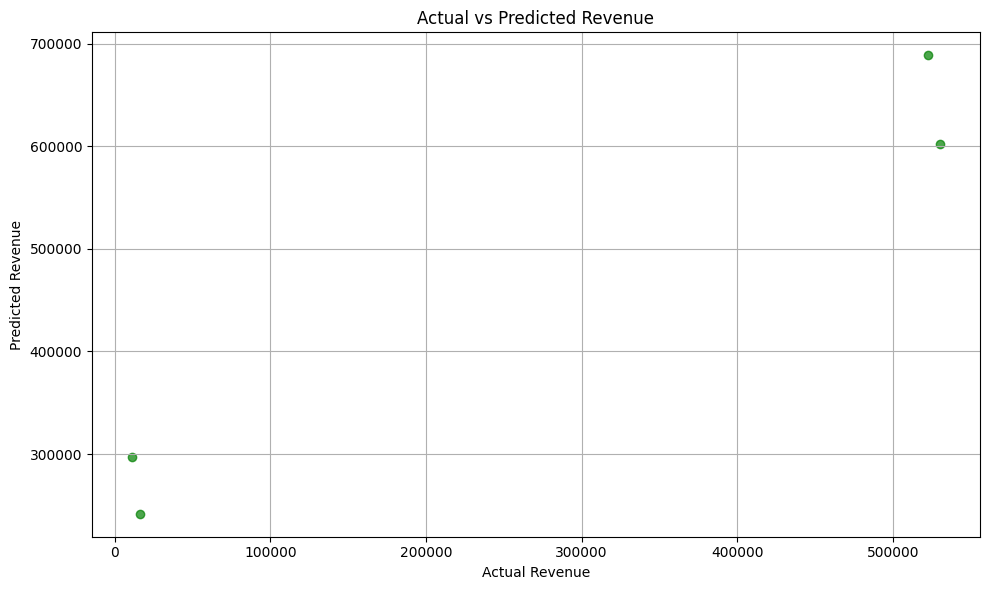

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Prepare the data
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.month
df['order_year'] = df['order_date'].dt.year

# Step 2: Group data to get total revenue
df['total_price'] = df['quantity'] * df['price']
revenue_data = df.groupby(['order_year', 'order_month', 'category'])['total_price'].sum().reset_index()

# Step 3: Encode categorical variable (category)
encoder = OneHotEncoder()
category_encoded = encoder.fit_transform(revenue_data[['category']]).toarray()
category_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out(['category']))

# Step 4: Combine features
X = pd.concat([revenue_data[['order_year', 'order_month']], category_df], axis=1)
y = revenue_data['total_price']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", round(r2*100,4))
print("RMSE:", round(rmse, 2))

# Step 8: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()
